# MA261 Modelling and Numerics: Assignment 1 Part 2


Student number: u2100098
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def npPrint(a, f={'float_kind':lambda x: "%.5e" % x}):
    print( np.array2string(a, formatter=f) )

---
### Q 2.0. Quiz Work

(1) We write a function to run one iteration of the Forward Euler method.

In [2]:
# Code from warmup quiz

def forwardEuler(f, Df, t0, y0, h):
    # your code to compute y1
    
    y1=y0+h*f(t0,y0)
    return y1

(2) Running 1 iteration of the approximation given in Q 1.1.

$$ y_{n+1} = y_n + \frac{h}{2} [f(t_n,y_n) +f(t_n + h, y_n +hf(t_n,y_n))]$$

and testing it with a simple test case.

In [3]:
# Code from Quiz 1
def Q11(f,Df, t0,y0, h):
    # your code to compute y1
    # y1=y0+h*f(t0,y0)
    y1=y0+(h/2)*(f(t0,y0)+f(t0+h,y0+h*f(t0,y0)))
    return y1

# One simple test case
npPrint( Q11(lambda t,y: -y, 
             lambda t,y: np.array([-1]), 
             0, np.array([1.]), 0.1) )

[9.05000e-01]


(3) Here we write a function called evolve to solve vector-valued ODEs of the form

$$y'(t)=f(t,y(t))$$
$$t \in (0,T)$$
$$y(t_0)=y_0$$

given an approximation $$y_{n+1}=\Phi(t_n,y_n;h).$$


In [4]:
# Code from Quiz 1
def evolve(phi, f,Df, t0,y0, T,N):
    # your code to compute y = numpy.array( [y0,...,yN] )

    n= np.arange(0,N+1,1)
    h=(T-t0)/N
    tn=n*h
    Y=np.zeros((N+1,len(y0)))
    Y[0] = y0
    
    for i in range(N):
        Y[i+1]=phi(f, Df, tn[i],Y[i],h)

    return tn,Y

(4) Writing a function computeEocs to compute the experimental order of convergence.

In [5]:
# Code from Quiz 1
def computeEocs(herr):
    # your code to compute eocs
    m = np.size(herr,0)
    eocs = np.zeros(m-1)
    h=herr[:,0]
    e=herr[:,1]
    for i in range(m-1):
        eocs[i] = (np.log(e[i+1]/e[i])) / (np.log(h[i+1]/h[i]))
    return eocs

---
### Q 2.1. Testing Implementation

Testing my implementation on a 2x2 ODE $y'(t)=f(t,y(t))$ and $y(0)=y_0$ with
$$f(t,y_1,y_2)=\begin{pmatrix}
y_2\\
y_2(\lambda-2y_1) 
\end{pmatrix}$$
for $t \in [0,T]$ and $T = 10$.

We use $\lambda =1$ and $y_0 = (2,-2)^T$ and compare to the exact solution. We compute the maximum errors and EOCs (experimental order of convergence).


In [6]:
Y = lambda t: np.array([ 2*np.exp(t) / (2*np.exp(t) - 1), -2*np.exp(t) / (4*np.exp(2*t) - 4*np.exp(t) + 1) ])
f = lambda t,y: np.array([y[1],y[1]*(1-2*y[0])])

T=10
y0 = np.array([2,-2])
max_error1 = np.zeros((10,2))

#Original code before I defined a function to reuse the same code for the rest of the questions
# for i in range(10):
#     error = []
#     N = 25 * (2**i)
#     h = T/N
#     t, y = evolve(forwardEuler,f,0,0,y0,T,N)
    
#     for j in range(np.shape(y)[0]):
#         error.append(np.linalg.norm(y[j]-Y(t[j])))
        
#     error = np.array(error)
#     max_error1[i,:] = [h,np.max(error)]

# This function applies a given method (parameter) to a vector valued ODE
# It returns the maximum errors E_h_i
def maxError(method,f,Y,y0,T,max_error):
    for i in range(10):
        error = []
        N = 25 * (2**i)
        h = T/N
        t, y = evolve(method,f,0,0,y0,T,N)

        for j in range(np.shape(y)[0]):
            error.append(np.linalg.norm(y[j]-Y(t[j])))

        error = np.array(error)
        max_error[i,:] = [h,np.max(error)]

    return max_error
    
max_error1 = maxError(forwardEuler,f,Y,y0,T,max_error1)

print("max error E_h_i:")
npPrint(max_error1)
print("EOCs:")
npPrint(computeEocs(max_error1))

max error E_h_i:
[[4.00000e-01 1.19752e+00]
 [2.00000e-01 3.84901e-01]
 [1.00000e-01 1.42446e-01]
 [5.00000e-02 6.52550e-02]
 [2.50000e-02 3.13566e-02]
 [1.25000e-02 1.53835e-02]
 [6.25000e-03 7.62053e-03]
 [3.12500e-03 3.79268e-03]
 [1.56250e-03 1.89197e-03]
 [7.81250e-04 9.44899e-04]]
EOCs:
[1.63749e+00 1.43407e+00 1.12626e+00 1.05732e+00 1.02738e+00 1.01342e+00
 1.00668e+00 1.00333e+00 1.00166e+00]


---
### Q 2.2. Using an approximation
We repeat the computations from Q2.1. using the Forward Euler method and the approximation from Q1.1.


In [7]:
max_error2 = np.zeros((10,2))

max_error2 = maxError(Q11,f,Y,y0,T,max_error2)

print("max error E_h_i:")
npPrint(max_error2)
print("EOCs:")
npPrint(computeEocs(max_error2))

max error E_h_i:
[[4.00000e-01 2.33601e-01]
 [2.00000e-01 5.72438e-02]
 [1.00000e-01 1.25299e-02]
 [5.00000e-02 2.89433e-03]
 [2.50000e-02 6.88980e-04]
 [1.25000e-02 1.68007e-04]
 [6.25000e-03 4.14827e-05]
 [3.12500e-03 1.03058e-05]
 [1.56250e-03 2.56836e-06]
 [7.81250e-04 6.41080e-07]]
EOCs:
[2.02886e+00 2.19174e+00 2.11408e+00 2.07069e+00 2.03594e+00 2.01794e+00
 2.00906e+00 2.00454e+00 2.00227e+00]


---
### Q 2.3. Efficiency comparison of the methods in Q2.1. and Q2.2.

In computing the approximations $y_0, y_1, ... ,y_N$, the forward Euler method in Q2.1. calls the function $N$ times, whereas the method in Q2.2. (using the approximation) calls the function $2N$ times. ($N = 25 \cdot 2^i$)

However, can see that the the errors of the two methods at each stage differ. The error when using the approximation is consistently less than half of the error when using the forward Euler method. See the graph and table of values below. 

The value of the error from the approximation divided by the error from the forward Euler method at each stage is computed in the code below:

In [8]:
for i in range(10):
    print(max_error2[i][1]/max_error1[i][1])

0.19507050231242315
0.14872325713724371
0.08796243114720718
0.044354143520147576
0.02197244658711707
0.010921269245047247
0.0054435427438862816
0.002717284205793373
0.0013575055425892578
0.0006784638999369103


Notice each value is substantially below 0.5.

See the figures below for a graphical representation.

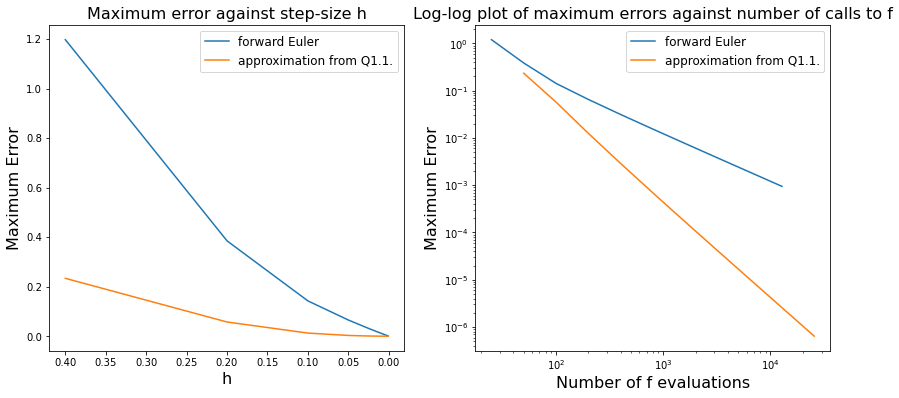

In [9]:
fcalls1=np.geomspace(25,12800,num=10)
fcalls2=np.geomspace(50,25600,num=10)

fig, ax = plt.subplots(1,2, figsize=(14,6))
ax[0].plot(max_error1[:, 0], max_error1[:, 1], label="forward Euler")
ax[0].plot(max_error2[:, 0], max_error2[:, 1], label="approximation from Q1.1.")
ax[0].legend(fontsize=12)
ax[0].invert_xaxis()
ax[0].set_xlabel("h", fontsize=16)
ax[0].set_ylabel('Maximum Error', fontsize=16)
ax[0].set_title("Maximum error against step-size h", fontsize=16)

ax[1].loglog(fcalls1,max_error1[:,1],label="forward Euler")
ax[1].loglog(fcalls2,max_error2[:,1],label="approximation from Q1.1.")
ax[1].legend(fontsize=12)
ax[1].set_xlabel("Number of f evaluations", fontsize=16)
ax[1].set_ylabel('Maximum Error', fontsize=16)
ax[1].set_title("Log-log plot of maximum errors against number of calls to f", fontsize=16)

plt.show()

The second graph is a log-log plot of the maximum errors against the number of function calls to f. This illustrates how, for a given error value, the number of f evaluations from the method in Q1.1. is far less than half of that of the forward Euler method.

Since the approximation only uses double the number of function calls, but has less than half the error, we can conclude that the approximation is more efficient than the forward Euler method.

---
### Q 2.4. Method of manufactured solutions

Consider $y'(t)=f(t,y(t))$ for $t \in [0,3]$. The exact solution is 
$$\underline{Y}(t)=\begin{cases} 
      \sin(t) & t\le \frac{\pi}{2} \\
      e^{t-\frac{\pi}{2}} & t\geq \frac{\pi}{2}
   \end{cases}
$$
and we consider a simple version of the RHS:
$$f(t,y)=\begin{cases} 
      \cos(t) & t\le \frac{\pi}{2} \\
      y & t\geq \frac{\pi}{2}
   \end{cases}$$
   
We use the method of manufactured solutions to investigate the forward Euler method and the approximation given in Q1.1.

In [10]:
# Defining python functions to implemement piecewise behaviour (not using lambda functions like before)
def Y(t):
    if t< np.pi/2:
        return np.sin(t)
    else:
        return np.exp(t-np.pi/2)

def f(t,y):
    if t<np.pi/2:
        return np.cos(t)
    else:
        return np.array([y])

y0 = np.array([0])
T=3
max_error3 = np.zeros((10,2))    

max_error3 = maxError(forwardEuler,f,Y,y0,T,max_error3)

print("Forward Euler Method:")
print("max error E_h_i:")
npPrint(max_error3)
print("EOCs:")
npPrint(computeEocs(max_error3))

Forward Euler Method:
max error E_h_i:
[[1.20000e-01 4.90234e-01]
 [6.00000e-02 2.41162e-01]
 [3.00000e-02 1.03184e-01]
 [1.50000e-02 3.04089e-02]
 [7.50000e-03 2.40459e-02]
 [3.75000e-03 5.22880e-03]
 [1.87500e-03 3.56577e-03]
 [9.37500e-04 2.73107e-03]
 [4.68750e-04 2.31293e-03]
 [2.34375e-04 1.12533e-03]]
EOCs:
[1.02347e+00 1.22478e+00 1.76266e+00 3.38699e-01 2.20124e+00 5.52268e-01
 3.84744e-01 2.39746e-01 1.03937e+00]


In [11]:
max_error4 = np.zeros((10,2))

max_error4 = maxError(Q11,f,Y,y0,T,max_error4)

print("Q1.1. Method:")
print("max error E_h_i:")
npPrint(max_error4)
print("EOCs:")
npPrint(computeEocs(max_error4))

Q1.1. Method:
max error E_h_i:
[[1.20000e-01 2.21094e-01]
 [6.00000e-02 8.45661e-02]
 [3.00000e-02 1.87087e-02]
 [1.50000e-02 1.34666e-02]
 [7.50000e-03 1.96899e-03]
 [3.75000e-03 5.91576e-03]
 [1.87500e-03 2.01545e-03]
 [9.37500e-04 6.17727e-05]
 [4.68750e-04 9.15947e-04]
 [2.34375e-04 4.26424e-04]]
EOCs:
[1.38651e+00 2.17637e+00 4.74330e-01 2.77385e+00 -1.58711e+00 1.55346e+00
 5.02799e+00 -3.89022e+00 1.10297e+00]


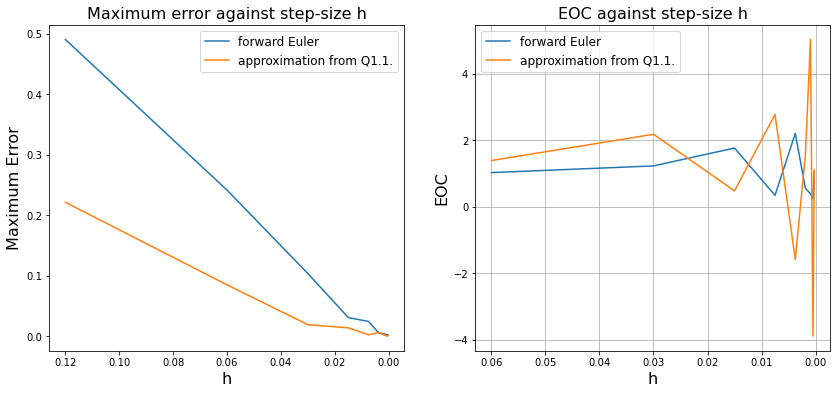

In [12]:
fig, ax = plt.subplots(1,2, figsize=(14,6))
ax[0].plot(max_error3[:, 0], max_error3[:, 1], label="forward Euler")
ax[0].plot(max_error4[:, 0],max_error4[:, 1], label="approximation from Q1.1.")
ax[0].invert_xaxis()
ax[0].legend(fontsize=12)
ax[0].set_xlabel('h', fontsize=16)
ax[0].set_ylabel('Maximum Error', fontsize=16)
ax[0].set_title("Maximum error against step-size h", fontsize=16)

ax[1].plot(max_error3[1:, 0], computeEocs(max_error3), label="forward Euler")
ax[1].plot(max_error4[1:, 0], computeEocs(max_error4), label="approximation from Q1.1.")
ax[1].invert_xaxis()
ax[1].legend(fontsize=12)
ax[1].grid(True)
ax[1].set_xlabel('h', fontsize=16)
ax[1].set_ylabel('EOC', fontsize=16)
ax[1].set_title("EOC against step-size h", fontsize=16)

plt.show()

(These graphs illustrate the behaviour of the maximum error and EOC values for different h values, using the forward Euler method and the approximation given in Q1.1. for the method of manufactured solutions.)

The graphs show that the EOC values do not converge, going against the theory we derived in part 1 of the assignment for the second method, and from lectures for the forward Euler method (they should converge quadratically and linearly respectively).

However, this is because the exact solution of the function is not continuously differentiable:

Consider $\underline{Y}(t)$.

If $t < \frac{\pi}{2}$ then $\frac{d}{dt}[\underline{Y}(t)] = \frac{d}{dt}[\sin(t)] = \cos(t)$.

If $t \geq \frac{\pi}{2}$ then $\frac{d}{dt}[\underline{Y}(t)] = \frac{d}{dt}[e^{t - \frac{\pi}{2}}] =e^{t - \frac{\pi}{2}}$.

However $\cos(\frac{\pi}{2}) = 0$ and $e^{\frac{\pi}{2}- \frac{\pi}{2}}= 1$ so at $t=\frac{\pi}{2}$ the function is not differentiable; it has a sharp bend at this point.

Since our theory in Q1.2. required the exact solution to be in $C^3$, the conditions are not satisfied so we cannot conclude that the errors converge quadratically.

The exact solution not being smooth also means that we cannot claim linear convergence for the forward Euler method.

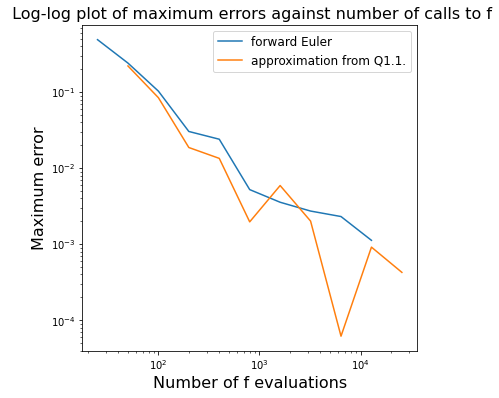

In [13]:
plt.figure(figsize=(6, 6))
plt.title(" Log-log plot of maximum errors against number of calls to f", fontsize=16)
plt.loglog(fcalls1,max_error3[:,1],label="forward Euler")
plt.loglog(fcalls2,max_error4[:,1],label="approximation from Q1.1.")
plt.legend(fontsize=12)
plt.xlabel("Number of f evaluations", fontsize=16)
plt.ylabel("Maximum error", fontsize=16)
plt.show()

As explained in Q2.3. we know that in computing the approximations $y_0, y_1, ... ,y_N$, the forward Euler method calls the function $N$ times, whereas the second approximation calls the function $2N$ times.

The graph above is a log-log plot of maximum errors against number of calls to the function f. We can see the error decreases as the number of f evaluations increases for both, but the approximation from Q1.1. decreases faster. The approximation only uses double the number of function calls as the forward Euler method, but the error is much less than half (remember the graph is a log-log plot), so we can again conclude that the approximation is more efficient than the forward Euler method.